In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.interpolate import CubicSpline
import xarray as xr
xr.set_options(display_style="html")  
import warnings
warnings.simplefilter("ignore") 

from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [3]:
# reading file with xarray
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [6]:
# splitting data by time slice
analysed = ds['analysed_sst']
means = analysed.sel(time = slice('2002','2012')).groupby('time.dayofyear').mean(skipna = True)
target = analysed.sel(time=slice('2002', '2016-07')).groupby('time.dayofyear')

months = (target - means ).idxmax('time', skipna=True).dt.month

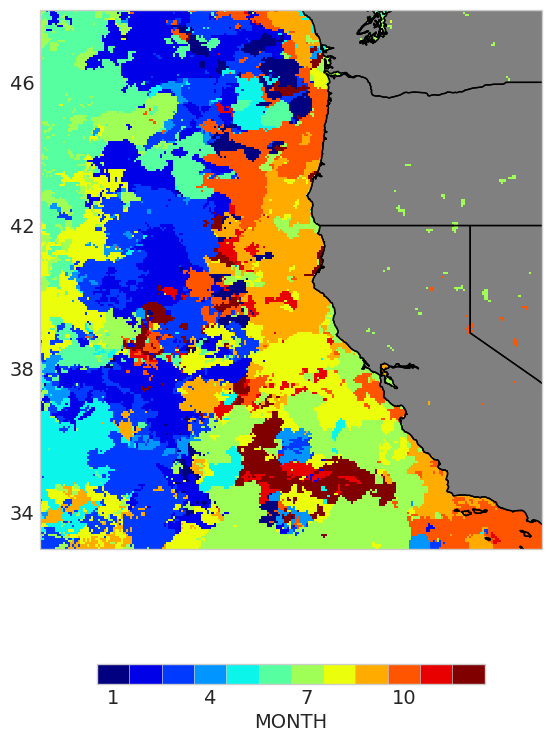

In [9]:
# plotting
fig1 = plt.figure(figsize = (20,10))
ax = plt.subplot(projection = crs)
fig2 = months.plot(transform = crs, ax=ax, cmap = 'jet', add_colorbar = False)
ax.set_yticks(range(34, 50, 4))
ax.set_ylabel('')
ax.set_xlabel('')
# adding color bar back to plot
colorbar = fig1.colorbar(fig2, ax=ax, drawedges = True, boundaries = np.arange(0.5, 13.5), shrink = .25, orientation = 'horizontal')
colorbar.set_label('MONTH')
colorbar.set_ticks([1, 4, 7, 10])
# adding us and gridlines to plot
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))

plt.show()

fig1.savefig('figureB_Q5.png')